# Regresja liniowa i wielomianowa

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import sklearn.linear_model as lm
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt

Proszę narysować wykres dowolnej funkcji na odcinku $[0,3]$.

Będzie to model, który będziemy chcieli znaleźć.

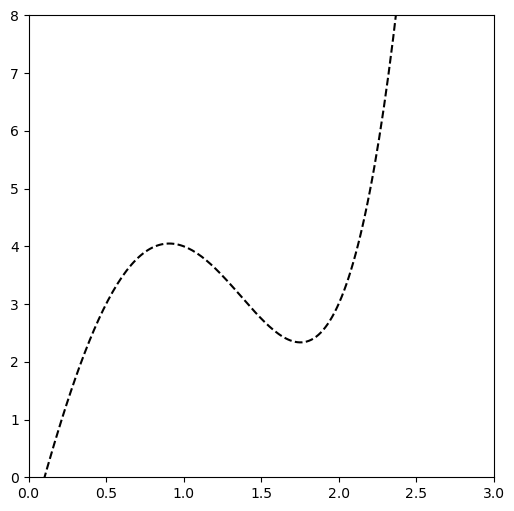

In [2]:
f = lambda x: ((x*2-1)*(x**2-2)*(x-2)+3)
x_tr = np.linspace(0, 3, 200)
y_tr = f(x_tr)
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_tr[:200], y_tr[:200], '--k');
plt.show()

Proszę wylosować kilka punktów z otoczenia funkcji $f(x)$.

Na ich podstawie będziemy wykonywać naszej presykcji.

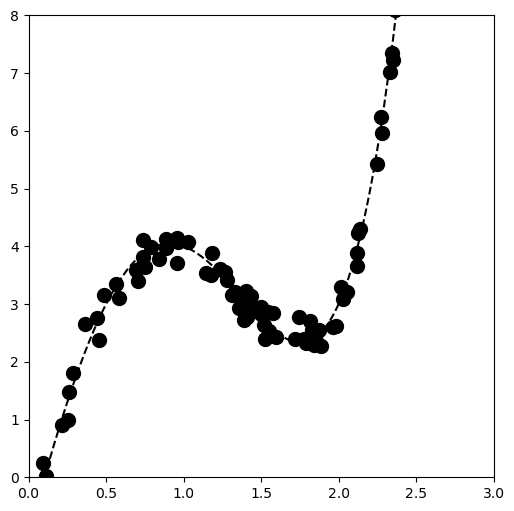

In [3]:
x = stats.uniform(0,3).rvs(100)
y = f(x) + stats.norm(0,0.2).rvs(len(x))
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_tr, y_tr, '--k');
plt.plot(x, y, 'ok', ms=10);
plt.show()

Nauczmy prosty model regresji liniowej

$$
y=a\cdot x + b
$$

na naszych danych.

Oraz narysujmy prostą regresji.
My narazie urzyjemy metody opartej na rozwiązaniu układu równań liniowych.

In [4]:
x=np.vstack(x)
model1 = linear_model.LinearRegression()
model1.fit(x, y)

LinearRegression()

In [5]:
print(model1.coef_)
print(model1.intercept_)
print(model1.score(x,y))

[6.82091773]
-4.48578360078283
0.49267140342691573


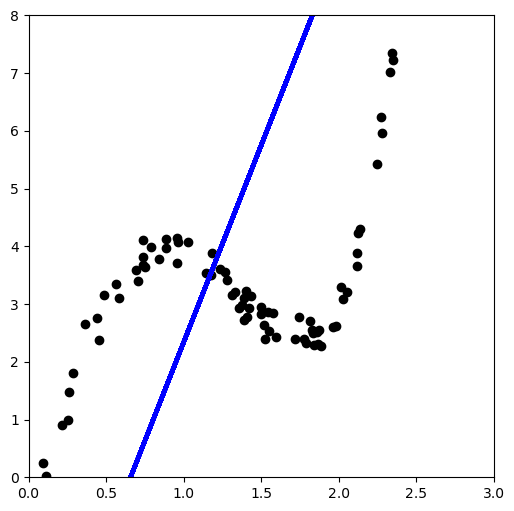

In [6]:
# Plot outputs
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.scatter(x, y,  color='black')
plt.plot(x, model1.predict(x), color='blue',linewidth=3)
plt.show()

# Zadanie
Nauczmy prosty model regresji

$$
y=a_1\cdot x + a_2 \cdot x^2 + b
$$

na naszych danych.

Oraz narysujmy prostą regresji.

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

In [9]:
model2 = make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression())
model2.fit(x, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])

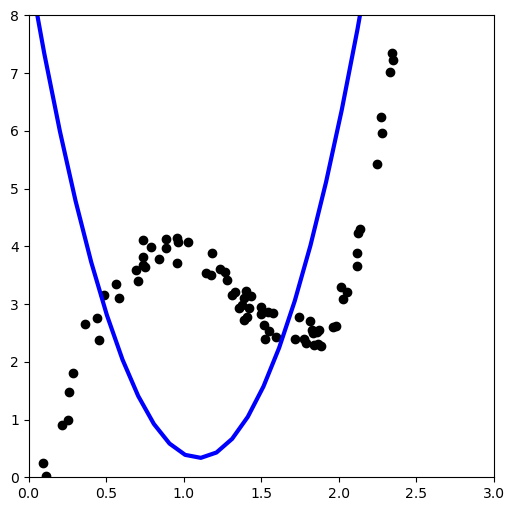

In [10]:
# Plot outputs
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.scatter(x, y,  color='black')
x_plot = np.vstack(np.linspace(0, 10, 100))
plt.plot(x_plot, model2.predict(x_plot), color='blue',linewidth=3)
plt.show()

# Zadanie
Nauczmy prosty model regresji

$$
y=a_1\cdot x + a_2 \cdot x^2 + a_3 \cdot x ^3 + b
$$

na naszych danych.

Oraz narysujmy prostą regresji.

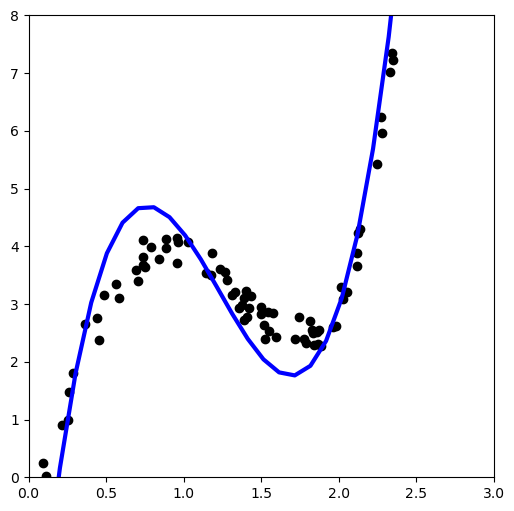

In [12]:
model3 = make_pipeline(PolynomialFeatures(3), linear_model.LinearRegression())
model3.fit(x, y)
# Plot outputs
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.scatter(x, y,  color='black')
x_plot = np.vstack(np.linspace(0, 10, 100))
plt.plot(x_plot, model3.predict(x_plot), color='blue',linewidth=3)
plt.show()

# Zadanie
Nauczmy prosty model regresji

$$
y=a_1\cdot x + a_2 \cdot x^2 + a_3 \cdot x ^3 + a_4 \cdot x ^4 + b
$$

na naszych danych.

Oraz narysujmy prostą regresji.

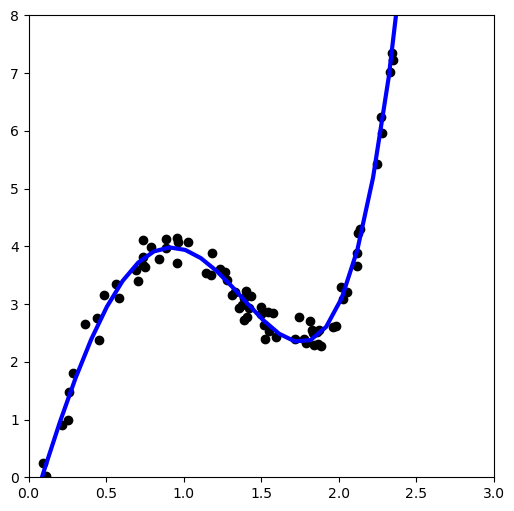

In [13]:
model4 = make_pipeline(PolynomialFeatures(4), linear_model.LinearRegression())
model4.fit(x, y)
# Plot outputs
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.scatter(x, y,  color='black')
x_plot = np.vstack(np.linspace(0, 10, 100))
plt.plot(x_plot, model4.predict(x_plot), color='blue',linewidth=3)
plt.show()

# Zadanie
Nauczmy prosty model regresji

$$
y=a_1\cdot x + a_2 \cdot x^2 + a_3 \cdot x ^3 + a_4 \cdot x ^4 + a_5 \cdot x^5 + b
$$

na naszych danych.

Oraz narysujmy prostą regresji.

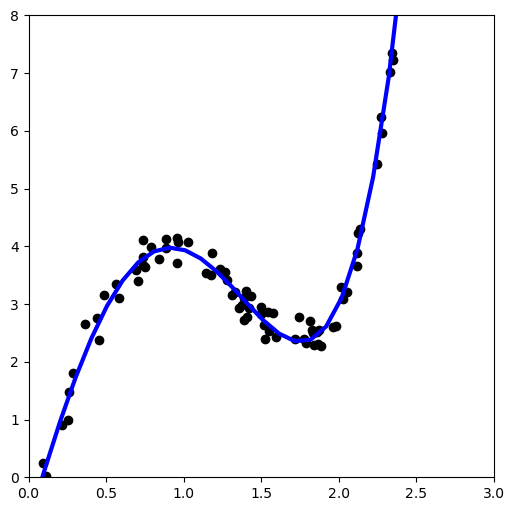

In [14]:
model5 = make_pipeline(PolynomialFeatures(5), linear_model.LinearRegression())
model5.fit(x, y)
# Plot outputs
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.scatter(x, y,  color='black')
x_plot = np.vstack(np.linspace(0, 10, 100))
plt.plot(x_plot, model5.predict(x_plot), color='blue',linewidth=3)
plt.show()

# Zadanie
Narysuj wszystkie wyniki na jednym wykresie.

## Która z krzywych jest najleprza?

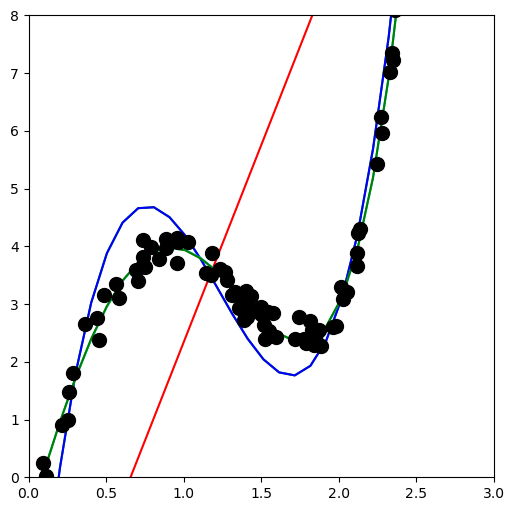

In [15]:
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_plot, model1.predict(x_plot), 'r');
plt.plot(x_plot, model2.predict(x_plot), 'g');
plt.plot(x_plot, model3.predict(x_plot), 'b');
plt.plot(x_plot, model4.predict(x_plot), 'c');
plt.plot(x_plot, model5.predict(x_plot), 'g');
plt.plot(x, y, 'ok', ms=10);
plt.show()

# Zadanie
Musimy mieć jakąś miarę oceny.

In [16]:
from sklearn import  metrics

error1 = np.average( np.abs(model1.predict(x) -y) )
print("Mean absolute errors: {}".format(error1))
print("Mean absolute errors: {}".format(metrics.mean_absolute_error(y, model1.predict(x))))

error2 = np.average( (model1.predict(x) -y) **2 )
print("Mean squared error: {}".format(error2))
print("Mean squared error: {}".format( metrics.mean_squared_error(y, model1.predict(x)) ))

error3 = np.median( np.abs(model1.predict(x) -y) )
print("Median absolute error: {}".format( error3 ))
print("Median absolute error: {}".format( metrics.median_absolute_error(y, model1.predict(x)) ))

print("R^2: {}".format(metrics.r2_score(y, model1.predict(x))))
ss_res=np.sum( (y-model1.predict(x))**2 )
ss_tot=np.sum( (y-np.mean(y))**2 )
R=1-ss_res/ss_tot
print("R^2: {}".format(R))

error4 = 1-np.var(y - model1.predict(x) )/np.var(y)
print("Explained variance score: {}".format( error4 ))
print("Explained variance score: {}".format( metrics.explained_variance_score(y, model1.predict(x)) ))


Mean absolute errors: 4.285933707556275
Mean absolute errors: 4.285933707556275
Mean squared error: 29.009725940702868
Mean squared error: 29.009725940702868
Median absolute error: 3.668995936277856
Median absolute error: 3.668995936277856
R^2: 0.49267140342691573
R^2: 0.49267140342691573
Explained variance score: 0.49267140342691584
Explained variance score: 0.49267140342691584


# Zadanie

Wylicz powyższe miary dla wszytkich modeli.

In [19]:
# powklejac z funkcji wyzzej

Median absolute error: 3.668995936277856


model1
Explained variance score: 0.5671024981460862
Median absolute error: 3.429749408028912
Mean squared error: 32.06603288914619
Mean absolute errors: 4.456948109978724
model2
Explained variance score: 0.8262963979794931
Median absolute error: 3.200497059547173
Mean squared error: 12.866753426616883
Mean absolute errors: 3.1072822476947497
model3
Explained variance score: 0.9917724400944231
Median absolute error: 0.5711004153125712
Mean squared error: 0.60944035343193
Mean absolute errors: 0.6369304345515707
model4
Explained variance score: 0.9993738397323646
Median absolute error: 0.1515290267694553
Mean squared error: 0.0463815929865281
Mean absolute errors: 0.17438028476640557
model5
Explained variance score: 0.999373862023442
Median absolute error: 0.15313137820101091
Mean squared error: 0.046379941818716214
Mean absolute errors: 0.17432842197705434
